In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('cleaned_play_store.csv')

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Day,year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January,7,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,15,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August,1,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June,8,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June,20,2018


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Month              object
Day                 int64
year                int64
dtype: object

In [6]:
df.dtypes == 'object'

App                True
Category           True
Rating            False
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres             True
Last Updated       True
Current Ver        True
Android Ver        True
Month              True
Day               False
year              False
dtype: bool

In [7]:
categorical_columns  = df.dtypes[df.dtypes == 'object'].index

In [8]:
categorical_columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Month'],
      dtype='object')

In [9]:
numerical_columns  = df.dtypes[df.dtypes != 'object'].index

In [10]:
numerical_columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'year'], dtype='object')

In [11]:
df[numerical_columns]

,Rating,Reviews,Size,Installs,Price,Day,year
0,4.1,159,19000.0,10000,0.0,7,2018
1,3.9,967,14000.0,500000,0.0,15,2018
2,4.7,87510,8.7,5000000,0.0,1,2018
3,4.5,215644,25000.0,50000000,0.0,8,2018
4,4.3,967,2.8,100000,0.0,20,2018
...,...,...,...,...,...,...,...
10835,4.5,38,53000.0,5000,0.0,25,2017
10836,5.0,4,3.6,100,0.0,6,2018
10837,4.3,3,9.5,1000,0.0,20,2017
10838,4.5,114,NaN,1000,0.0,19,2015


In [12]:
df[numerical_columns].describe()

,Rating,Reviews,Size,Installs,Price,Day,year
count,10840.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,4.206476,4.441529e+05,19579.419913,1.546434e+07,1.027368,15.609041,2017.399723
std,0.480342,2.927761e+06,24042.062020,8.502936e+07,15.949703,9.561621,1.100914
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,2010.000000
25%,4.100000,3.800000e+01,5.600000,1.000000e+03,0.000000,6.000000,2017.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,16.000000,2018.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000,24.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,31.000000,2018.000000


In [13]:
# Univarient_analysis

In [14]:
categorical_columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Month'],
      dtype='object')

In [15]:
for i in categorical_columns:
    print(i, df[i].value_counts(normalize=True)*100)
    print('-'*80)

App App
ROBLOX                                                0.083026
CBS Sports App - Scores, News, Stats & Watch Live     0.073801
ESPN                                                  0.064576
Duolingo: Learn Languages Free                        0.064576
Candy Crush Saga                                      0.064576
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009225
U-Report                                              0.009225
U of I Community Credit Union                         0.009225
Waiting For U Launcher Theme                          0.009225
iHoroscope - 2018 Daily Horoscope & Astrology         0.009225
Name: proportion, Length: 9659, dtype: float64
--------------------------------------------------------------------------------
Category Category
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS             

In [16]:
df['Category'].value_counts(normalize=True)*100

Category
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNICATION           3.570111
SPORTS                  3.542435
LIFESTYLE               3.523985
FINANCE                 3.376384
HEALTH_AND_FITNESS      3.145756
PHOTOGRAPHY             3.090406
SOCIAL                  2.721402
NEWS_AND_MAGAZINES      2.610701
SHOPPING                2.398524
TRAVEL_AND_LOCAL        2.380074
DATING                  2.158672
BOOKS_AND_REFERENCE     2.130996
VIDEO_PLAYERS           1.614391
EDUCATION               1.439114
ENTERTAINMENT           1.374539
MAPS_AND_NAVIGATION     1.263838
FOOD_AND_DRINK          1.171587
HOUSE_AND_HOME          0.811808
AUTO_AND_VEHICLES       0.784133
LIBRARIES_AND_DEMO      0.784133
WEATHER                 0.756458
ART_AND_DESIGN          0.599631
EVENTS                  0.590406
P

In [17]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [18]:
numerical_columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'year'], dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\2591713397.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df['Rating'], shade = True, color= 'r')


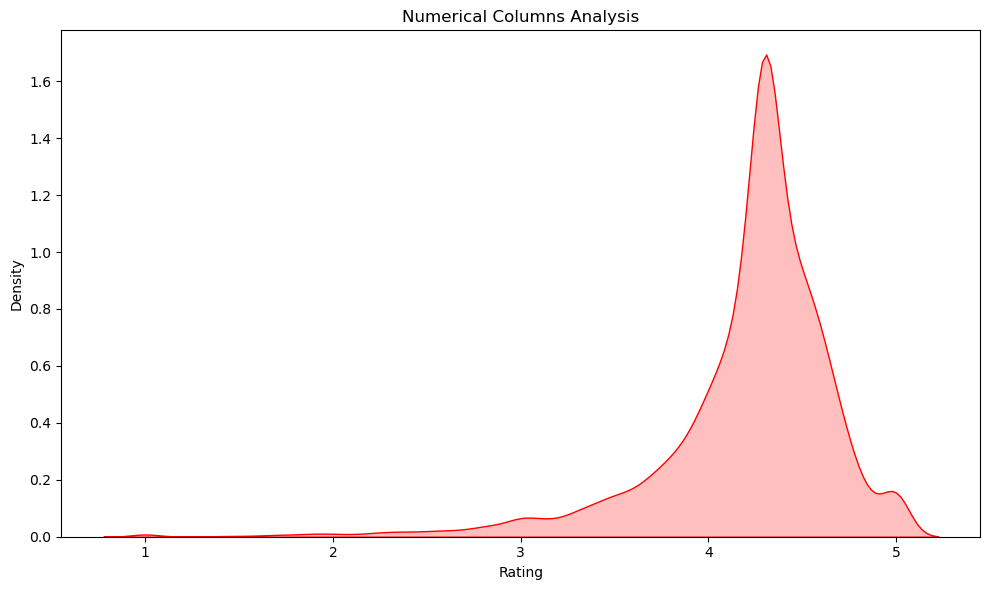

In [21]:
plt.figure(figsize=(10,6))
plt.title('Numerical Columns Analysis')
sns.kdeplot(x = df['Rating'], shade = True, color= 'r')
plt.xlabel('Rating')
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\77861326.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df['year'], shade = True, color= 'r')


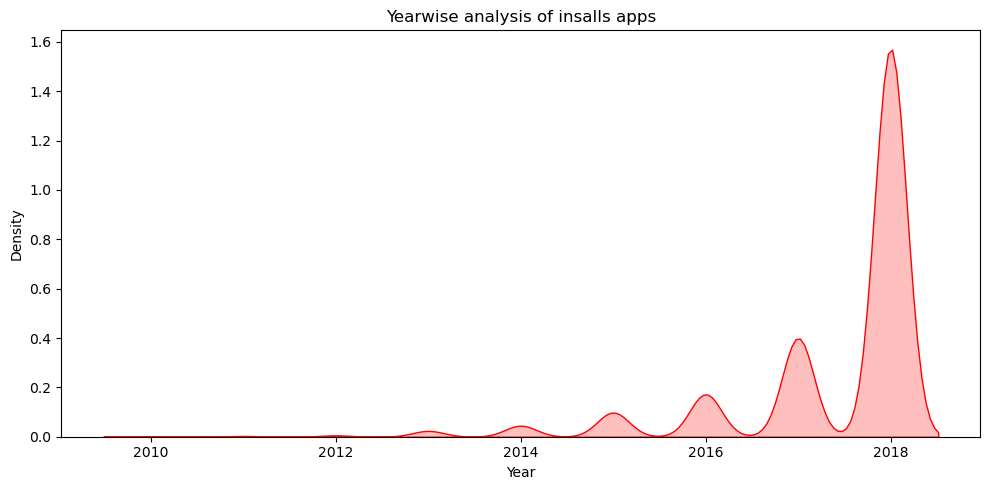

In [25]:
plt.figure(figsize=(10,5))
plt.title('Yearwise analysis of insalls apps')
sns.kdeplot(x = df['year'], shade = True, color= 'r')
plt.xlabel('Year')
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\3201304352.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[i], shade = True, color= 'r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\3201304352.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[i], shade = True, color= 'r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\3201304352.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[i], shade = True, color= 'r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\3201304352.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error i

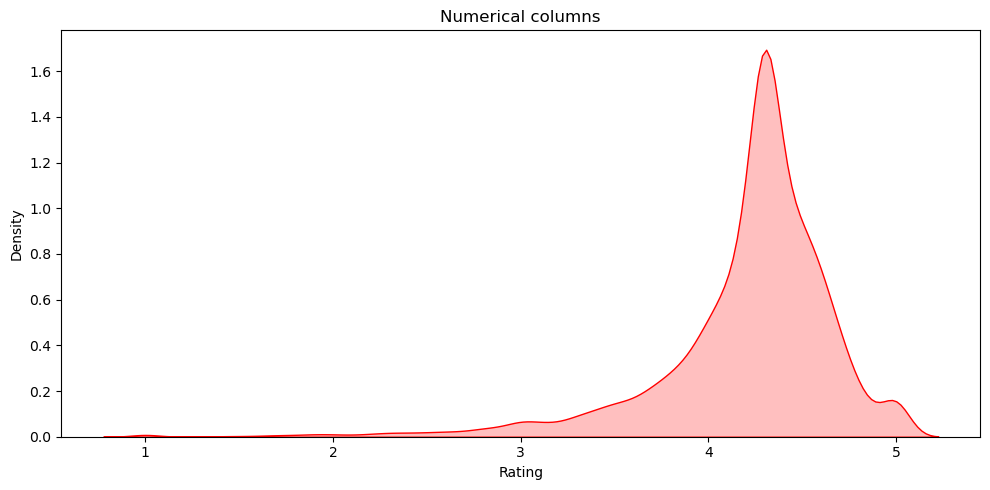

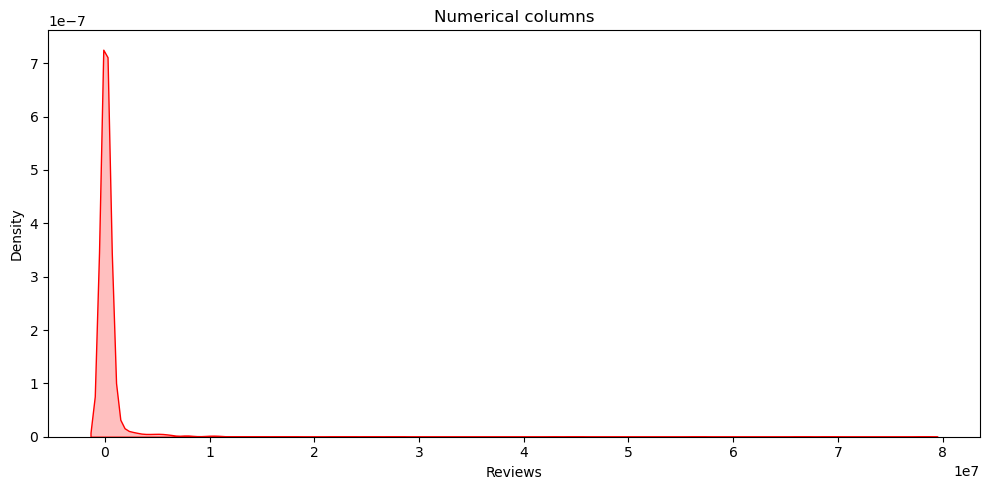

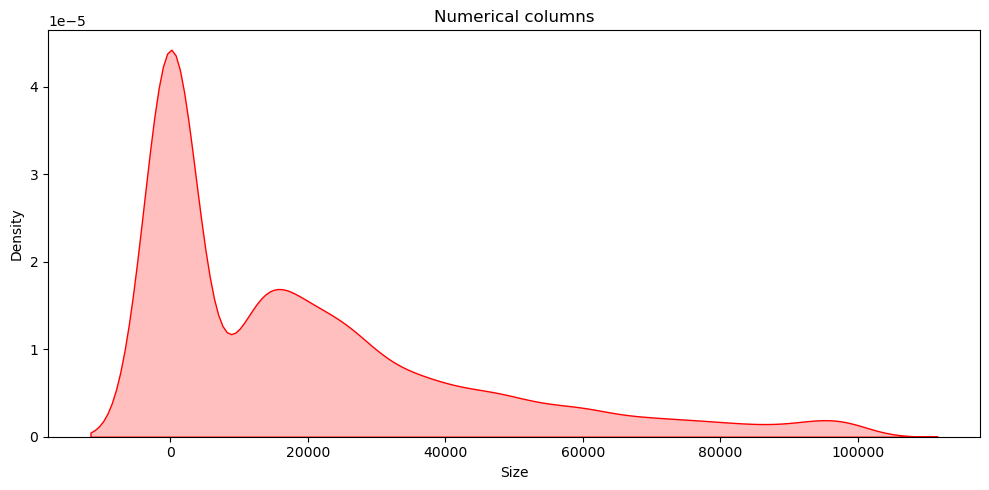

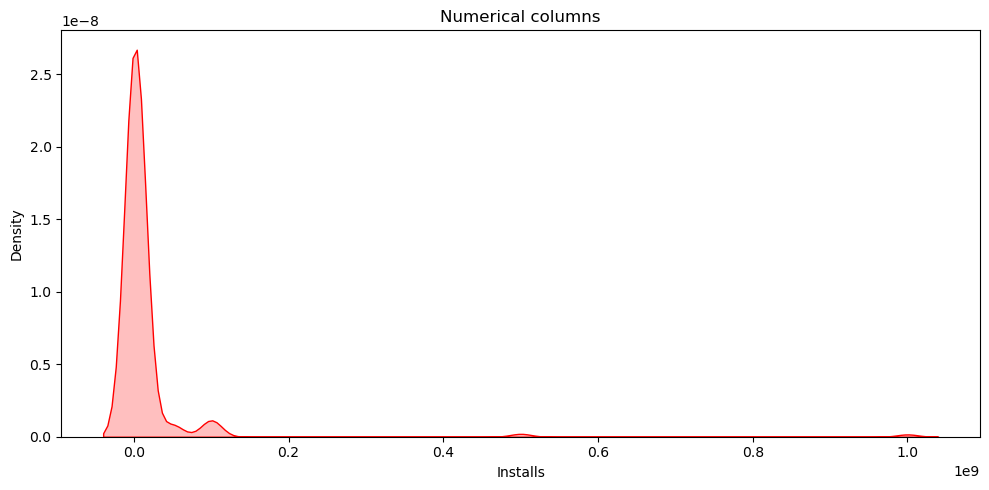

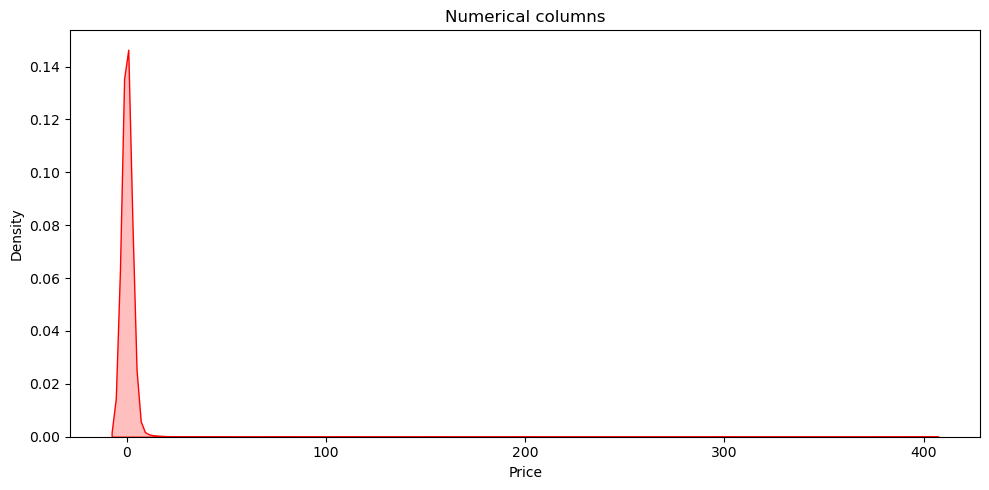

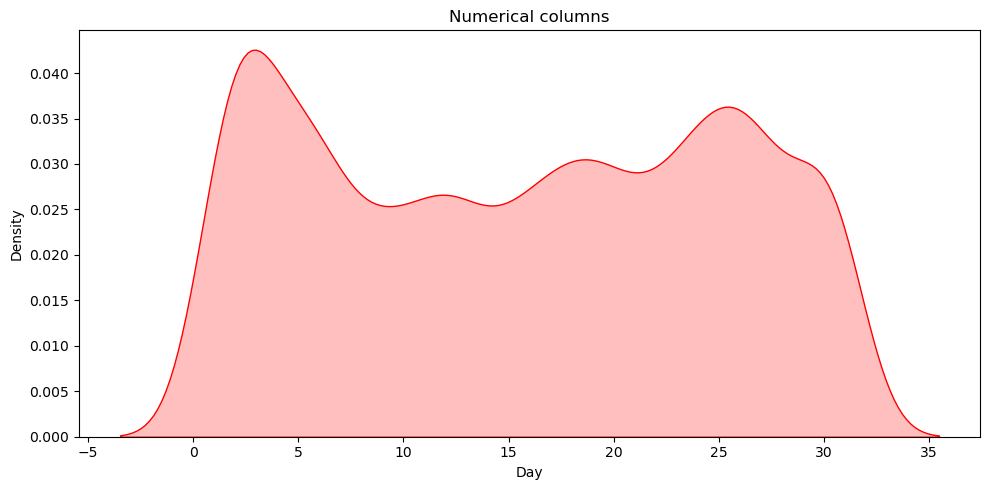

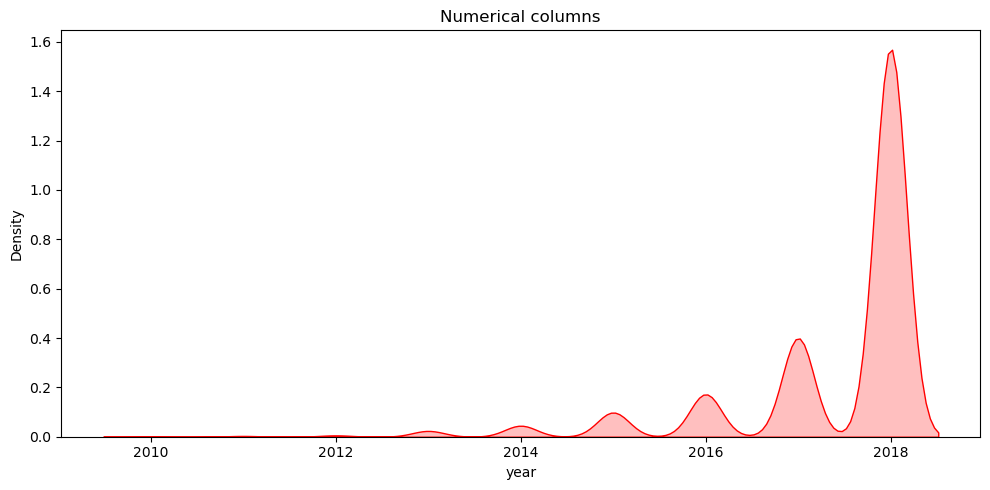

In [27]:
for i in numerical_columns:
    plt.figure(figsize=(10,5))
    plt.title('Numerical columns')
    sns.kdeplot(x = df[i], shade = True, color= 'r')
    plt.xlabel(i)
    plt.tight_layout()

# Categorical Analysis

In [28]:
categorical_columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Month'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\988384804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Type'], palette= 'Set2')


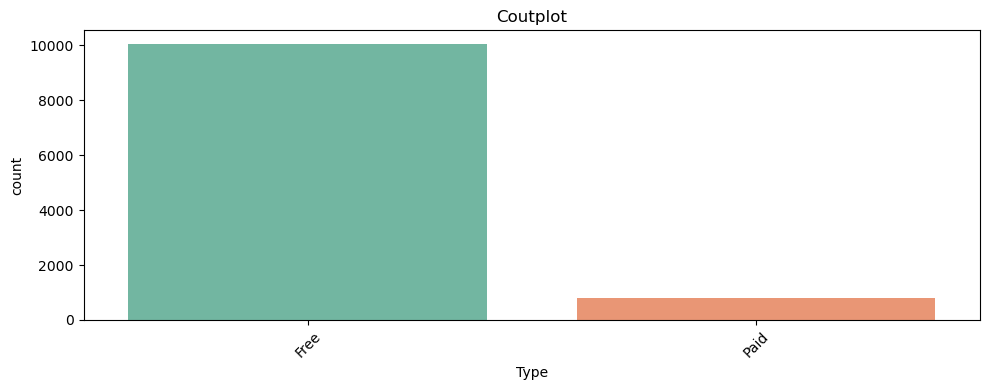

In [34]:
plt.figure(figsize=(10,4))
plt.title('Coutplot')
sns.countplot(x = df['Type'], palette= 'Set2')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\2459236751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Content Rating'], palette= 'Set2')


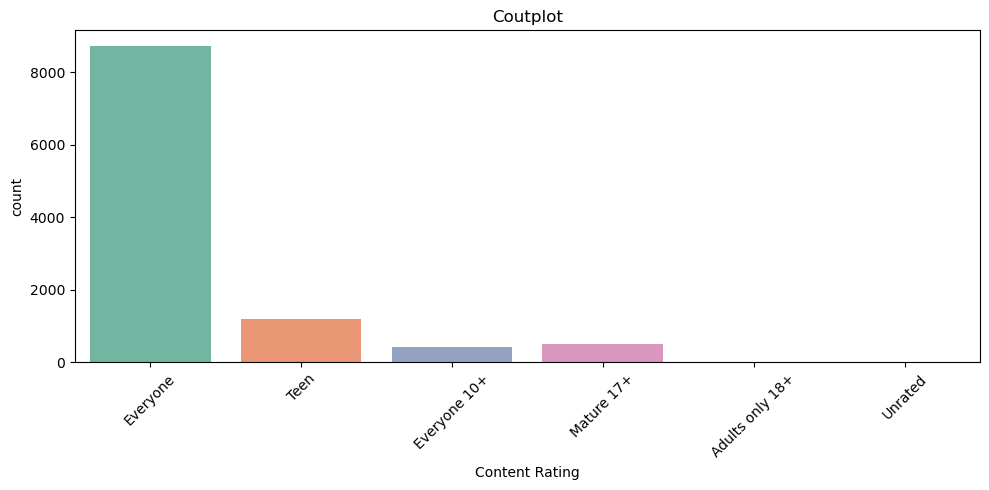

In [36]:
plt.figure(figsize=(10,5))
plt.title('Coutplot')
sns.countplot(x = df['Content Rating'], palette= 'Set2')
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: ylabel='count'>

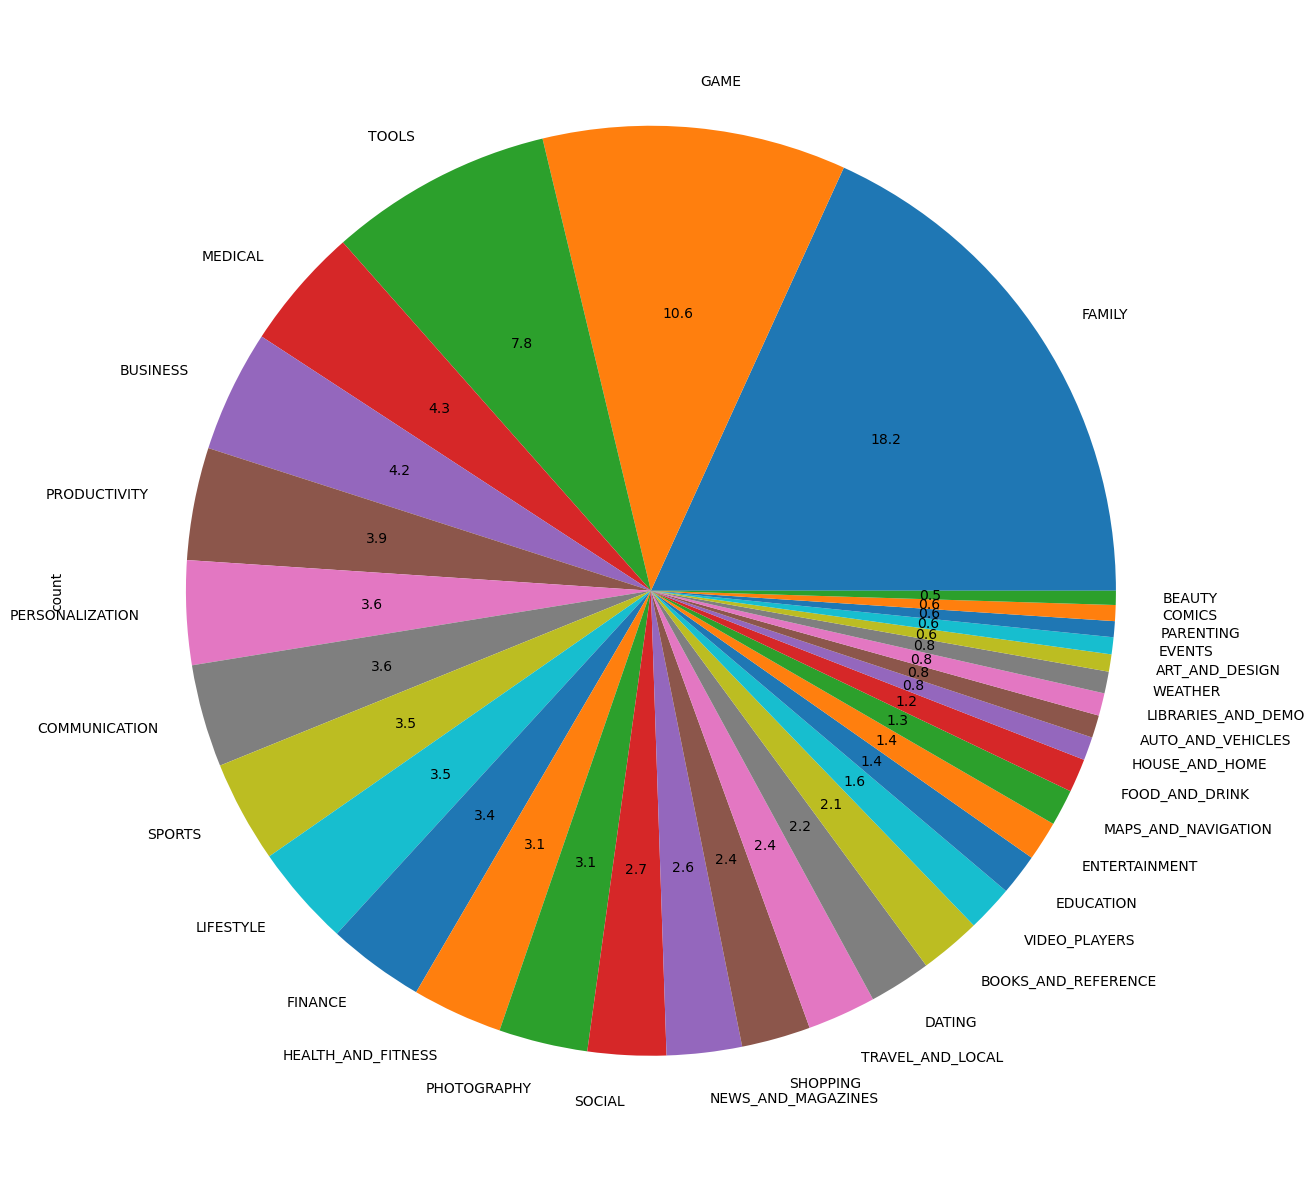

In [39]:
df['Category'].value_counts().plot.pie(y = df['Category'], figsize = (15,16), autopct = '%1.1f')

In [40]:
# Top 10 categories 

In [51]:
category_count   = pd.DataFrame(df['Category'].value_counts())

In [53]:
category_count.head(10)

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


C:\Users\Admin\AppData\Local\Temp\ipykernel_10760\3543121567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index[:10], y = 'count', data = category_count[:10], palette='hls')


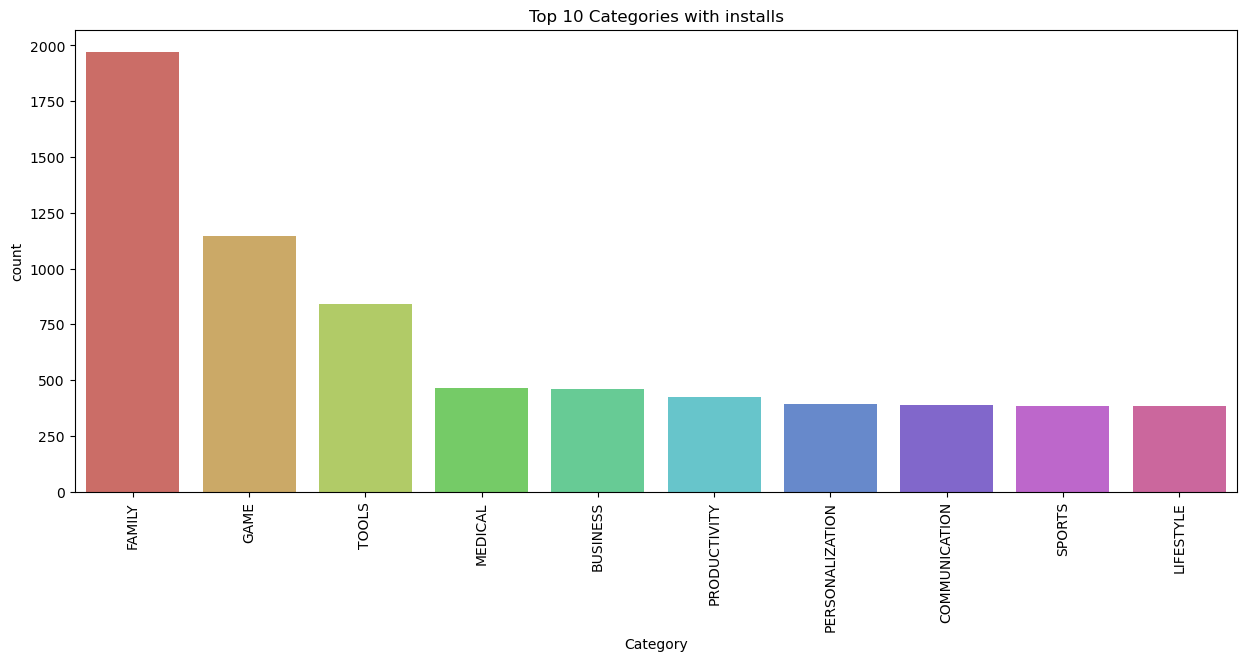

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(x=category_count.index[:10], y = 'count', data = category_count[:10], palette='hls')
plt.title('Top 10 Categories with installs')
plt.xticks(rotation=90)
plt.show()

In [58]:
category_count.index[:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE'],
      dtype='object', name='Category')

In [60]:
category_count[:10]

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [61]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Day,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June,20,2018


In [ ]:
# To0 5 categories based on installs